# Proyecto 8 

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

En esta tarea completarás el primer paso del proyecto.

Escribe un código para analizar los datos sobre el clima en Chicago en noviembre de 2017 desde el sitio web:

[https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html)

El nombre del DataFrame debe ser weather_records y tienes que especificarlo cuando buscas: attrs={"id": "weather_records"} . Imprime el DataFrame completo.

In [2]:
import pandas as pd

# URL del sitio web
url = "https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html"

# Leer la tabla con el id específico
weather_records = pd.read_html(url, attrs={"id": "weather_records"})[0]

# Imprimir el DataFrame completo
print(weather_records)

           Date and time  Temperature       Description
0    2017-11-01 00:00:00       276.15     broken clouds
1    2017-11-01 01:00:00       275.70  scattered clouds
2    2017-11-01 02:00:00       275.61   overcast clouds
3    2017-11-01 03:00:00       275.35     broken clouds
4    2017-11-01 04:00:00       275.24     broken clouds
..                   ...          ...               ...
692  2017-11-29 20:00:00       281.34        few clouds
693  2017-11-29 21:00:00       281.69      sky is clear
694  2017-11-29 22:00:00       281.07        few clouds
695  2017-11-29 23:00:00       280.06      sky is clear
696  2017-11-30 00:00:00       278.46      sky is clear

[697 rows x 3 columns]


Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad

name: nombre del barrio
neighborhood_id: código del barrio
tabla cabs: datos sobre los taxis

cab_id: código del vehículo
vehicle_id: ID técnico del vehículo
company_name: la empresa propietaria del vehículo
tabla trips: datos sobre los viajes

trip_id: código del viaje
cab_id: código del vehículo que opera el viaje
start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)
end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)
duration_seconds: duración del viaje en segundos
distance_miles: distancia del viaje en millas
pickup_location_id: código del barrio de recogida
dropoff_location_id: código del barrio de finalización
tabla weather_records: datos sobre el clima

record_id: código del registro meteorológico
ts: fecha y hora del registro (tiempo redondeado a la hora)
temperature: temperatura cuando se tomó el registro
description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

### Esquema de la Tabla:

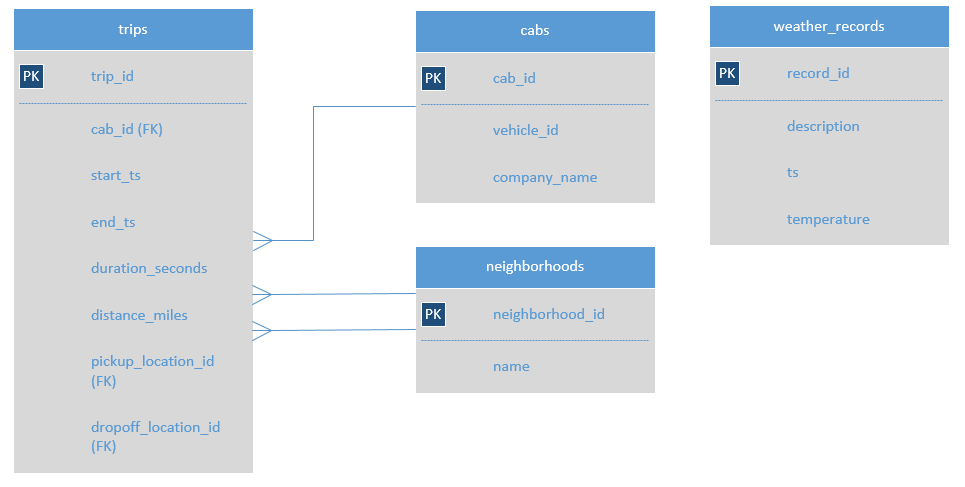

Nota: no existe una conexión directa entre las tablas trips y weather_records en la base de datos. Pero aún puedes usar JOIN y vincularlos usando la hora en la que comenzó el viaje (trips.start_ts) y la hora en la que se tomó el registro meteorológico (weather_records.ts).

Ejercicios de 1 a 3: Análisis exploratorio de datos

Ejercicios de 4 a 6: Prueba la hipótesis de que la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

1. Imprime el campo company_name. Encuentra la cantidad de viajes en taxi para cada compañía de taxis para el 15 y 16 de noviembre de 2017, asigna al campo resultante el nombre trips_amount e imprímelo también. Ordena los resultados por el campo trips_amount en orden descendente.

In [16]:
#SELECT
#    cabs.company_name AS company_name,
#    COUNT(trips.trip_id) AS trips_amount
#FROM
#    trips
#INNER JOIN cabs ON trips.cab_id = cabs.cab_id
#WHERE
#    CAST(trips.start_ts AS DATE) IN ('2017-11-15', '2017-11-16')
#GROUP BY
#    cabs.company_name
#ORDER BY
#    trips_amount DESC;

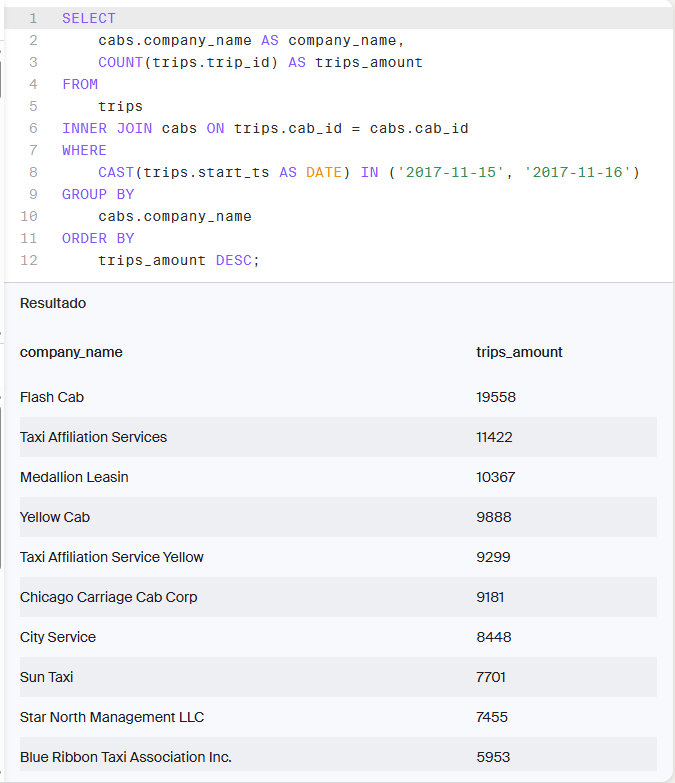

2. Encuentra la cantidad de viajes para cada empresa de taxis cuyo nombre contenga las palabras "Yellow" o "Blue" del 1 al 7 de noviembre de 2017. Nombra la variable resultante trips_amount. Agrupa los resultados por el campo company_name.

In [15]:
#SELECT
#    cabs.company_name AS company_name,
#    COUNT(trips.trip_id) AS trips_amount
#FROM
#    trips
#INNER JOIN cabs ON trips.cab_id = cabs.cab_id
#WHERE
#    CAST(trips.start_ts AS DATE) BETWEEN '2017-11-01' AND '2017-11-07'
#    AND (
#        cabs.company_name LIKE '%Yellow%'
#        OR cabs.company_name LIKE '%Blue%'
#        )
#GROUP BY
#    cabs.company_name;

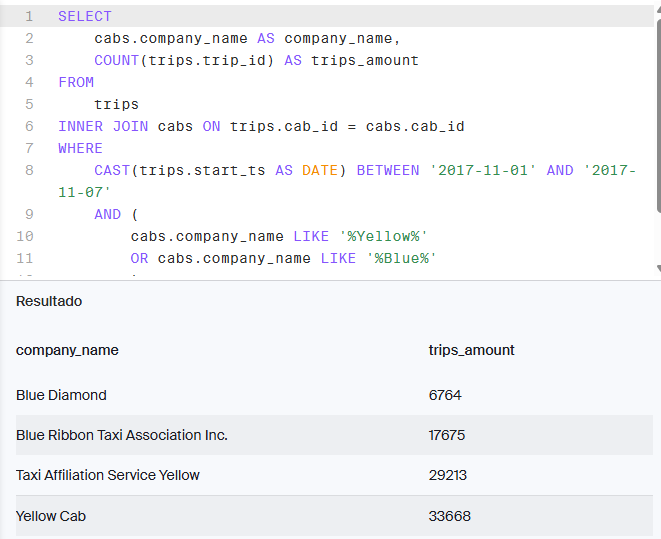

3. Del 1 al 7 de noviembre de 2017, las empresas de taxis más populares fueron Flash Cab y Taxi Affiliation Services. Encuentra el número de viajes de estas dos empresas y asigna a la variable resultante el nombre trips_amount. Junta los viajes de todas las demás empresas en el grupo "Other". Agrupa los datos por nombres de empresas de taxis. Asigna el nombre company al campo con nombres de empresas de taxis. Ordena el resultado en orden descendente por trips_amount.

In [ ]:
# SELECT
#     CASE
        WHEN cabs.company_name = 'Flash Cab' THEN 'Flash Cab'
        WHEN cabs.company_name = 'Taxi Affiliation Services' THEN 'Taxi Affiliation Services'
        ELSE 'Other'
    END AS company,
    COUNT(trips.trip_id) AS trips_amount
FROM
    trips
INNER JOIN cabs
    ON trips.cab_id = cabs.cab_id
WHERE
    CAST(trips.start_ts AS DATE) BETWEEN '2017-11-01' AND '2017-11-07'
GROUP BY
    company
ORDER BY
    trips_amount DESC;